## Maximizing Revenue for Drivers


## Problem Statement

To maximize the revenue streams for taxi drivers in order to meet this need.our research aims to determine whether payments methods have an impact on fare prices by focusing on relationship between payment type and fare amount.

## OBJECTIVE
    


To run A/B test to examine the relationship between the total fare and the method of payment.We use python Hypotheis testing and descriptive statistics 
to extract useful information that can help taxi drivers generate more cash.In particular ,we want to find out if there is a big diffrece between in the fares for those who pay 
with credit cards versus those who pay withcash.

## Research Question

Is there any relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate methods that generate higher revenue for drivers ,without negatively  impacting cuustomer experience. 

## Importing Libraries

In [87]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   --------- ------------------------------ 2.4/9.6 MB 12.2 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.6 MB 11.9 MB/s eta 0:00:01
   ----------------------------- ---------- 7.1/9.6 MB 11.5 MB/s eta 0:00:01
   ------------------------------------- -- 8.9/9.6 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 10.1 MB/s eta 0:00:00


In [398]:
pip install pandas numpy matplotlib scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------- ----------------------- 3.7/8.7 MB 11.5 MB/s eta 0:00:01
   ---------------------------- ----------- 6.3/8.7 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 11.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as st
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Loading Dataset

In [3]:
taxi_data = pd.read_csv("yellow_tripdata_2020-01.csv")

In [4]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,01-01-2020 00:28,01-01-2020 00:33,1,1.2,1,N,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,01-01-2020 00:35,01-01-2020 00:43,1,1.2,1,N,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1,01-01-2020 00:47,01-01-2020 00:53,1,0.6,1,N,238,238,1,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1,01-01-2020 00:55,01-01-2020 01:00,1,0.8,1,N,238,151,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2,01-01-2020 00:01,01-01-2020 00:04,1,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


## Exploratory Data Analysis

How many records are present in data.

In [341]:
taxi_data.shape

(1048575, 18)

In [342]:
taxi_data.tail().dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [5]:
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'], dayfirst=True)
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'], dayfirst=True)
taxi_data.tpep_pickup_datetime

0         2020-01-01 00:28:00
1         2020-01-01 00:35:00
2         2020-01-01 00:47:00
3         2020-01-01 00:55:00
4         2020-01-01 00:01:00
                  ...        
1048570   2020-01-07 07:33:00
1048571   2020-01-07 07:40:00
1048572   2020-01-07 07:19:00
1048573   2020-01-07 07:41:00
1048574   2020-01-07 07:39:00
Name: tpep_pickup_datetime, Length: 1048575, dtype: datetime64[ns]

In [6]:
taxi_data.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [7]:
taxi_data['duration'] = taxi_data['tpep_dropoff_datetime'] - taxi_data['tpep_pickup_datetime']

# converting into minutes
taxi_data['duration'] = taxi_data['duration'].dt.total_seconds()/60

In [8]:
taxi_data=taxi_data[['passenger_count','payment_type','fare_amount','trip_distance','duration']]
taxi_data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.2,5.0
1,1,1,7.0,1.2,8.0
2,1,1,6.0,0.6,6.0
3,1,1,5.5,0.8,5.0
4,1,2,3.5,0.0,3.0
...,...,...,...,...,...
1048570,1,2,5.5,0.7,5.0
1048571,1,1,8.5,1.3,10.0
1048572,1,1,7.5,1.4,9.0
1048573,3,1,5.5,0.7,4.0


In [347]:
taxi_data.shape

(1048575, 5)

In [348]:
taxi_data.isnull().sum()


passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
duration           0
dtype: int64

In [9]:
# as the data has only 1% of data missing, we can simply drop the records with missing values.
taxi_data.dropna(inplace = True)

In [10]:
taxi_data#df[passenger_count]=df['passenger_count'].astype('int64')

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.2,5.0
1,1,1,7.0,1.2,8.0
2,1,1,6.0,0.6,6.0
3,1,1,5.5,0.8,5.0
4,1,2,3.5,0.0,3.0
...,...,...,...,...,...
1048570,1,2,5.5,0.7,5.0
1048571,1,1,8.5,1.3,10.0
1048572,1,1,7.5,1.4,9.0
1048573,3,1,5.5,0.7,4.0


In [11]:
taxi_data[taxi_data.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
250,1,1,10.5,2.0,13.0
271,2,1,6.5,1.4,6.0
327,1,2,3.5,0.5,1.0
341,1,1,10.0,1.5,14.0
367,1,1,4.5,0.6,4.0
...,...,...,...,...,...
1048570,1,2,5.5,0.7,5.0
1048571,1,1,8.5,1.3,10.0
1048572,1,1,7.5,1.4,9.0
1048573,3,1,5.5,0.7,4.0


In [12]:
taxi_data.drop_duplicates(inplace=True)
taxi_data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.20,5.0
1,1,1,7.0,1.20,8.0
2,1,1,6.0,0.60,6.0
3,1,1,5.5,0.80,5.0
4,1,2,3.5,0.00,3.0
...,...,...,...,...,...
1048522,1,1,25.0,4.92,36.0
1048533,1,1,12.0,3.43,8.0
1048541,1,1,27.0,7.90,31.0
1048549,6,1,14.0,3.89,13.0


In [13]:
taxi_data.shape

(280831, 5)

In [356]:
taxi_data['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.498788
2    0.206594
3    0.087522
5    0.074632
4    0.059189
6    0.050974
0    0.022230
7    0.000036
8    0.000021
9    0.000014
Name: proportion, dtype: float64

In [357]:
taxi_data['payment_type'].value_counts(normalize=True)

payment_type
1    0.598128
2    0.379306
3    0.013296
4    0.009269
Name: proportion, dtype: float64

In [14]:
# filtering for payment type 1 and 2
taxi_data = taxi_data[taxi_data['payment_type']<3].astype(int)

# filtering for passenger count from 1 to 2
taxi_data = taxi_data[(taxi_data['passenger_count']>0)&(taxi_data['passenger_count']<6)]


In [359]:
taxi_data.shape

(254311, 5)

In [15]:
taxi_data['payment_type'].replace([1,2],['Card','Cash'], inplace = True)

In [16]:
taxi_data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6,1,5
1,1,Card,7,1,8
2,1,Card,6,0,6
3,1,Card,5,0,5
4,1,Cash,3,0,3
...,...,...,...,...,...
1048495,3,Card,52,17,31
1048504,2,Card,52,25,50
1048522,1,Card,25,4,36
1048533,1,Card,12,3,8


In [362]:
taxi_data['passenger_count'].unique()

array([1, 4, 2, 3, 5])

In [363]:
taxi_data.describe()


,passenger_count,fare_amount,trip_distance,duration
count,254311.000000,254311.000000,254311.000000,254311.000000
mean,1.934462,23.534153,6.197825,33.970591
std,1.273179,18.755231,6.084920,133.525464
min,1.000000,-500.000000,-22.000000,-2770.000000
25%,1.000000,11.000000,2.000000,12.000000
50%,1.000000,18.000000,4.000000,19.000000
75%,2.000000,31.000000,9.000000,28.000000
max,5.000000,1238.000000,259.000000,4168.000000


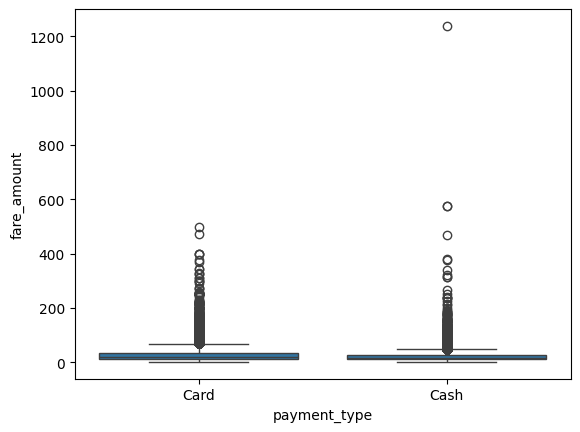

In [17]:
# filtering records only positive
taxi_data = taxi_data[taxi_data['fare_amount']>0]
taxi_data = taxi_data[taxi_data['trip_distance']>0]
taxi_data = taxi_data[taxi_data['duration']>0]# check for the outliers
sns.boxplot(data=taxi_data, y="fare_amount", x="payment_type")
plt.show()

In [18]:
# removing outliers using interquartile range for the numerical variables
for col in ['trip_distance','fare_amount','duration']:
    Q1 = taxi_data[col].quantile(0.25)
    Q3 = taxi_data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    taxi_data = taxi_data[(taxi_data[col] >= lower_bound) & (taxi_data[col] <= upper_bound)]
    


In [366]:
taxi_data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6,1,5
1,1,Card,7,1,8
10,2,Card,12,2,17
12,1,Card,17,3,25
13,1,Card,6,1,6
...,...,...,...,...,...
1048451,1,Cash,12,3,13
1048495,3,Card,52,17,31
1048522,1,Card,25,4,36
1048533,1,Card,12,3,8


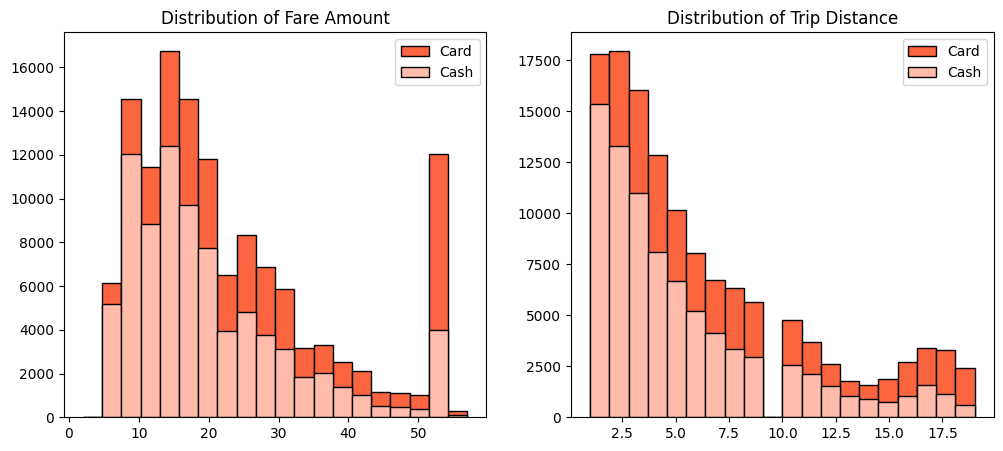

In [367]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(taxi_data[taxi_data['payment_type']=='Card']['fare_amount'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#FA643F', label = 'Card')
plt.hist(taxi_data[taxi_data['payment_type']=='Cash']['fare_amount'],  histtype='barstacked',bins = 20, edgecolor = 'k', color = '#FFBCAB',label = 'Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of Trip Distance')
plt.hist(taxi_data[taxi_data['payment_type']=='Card']['trip_distance'], histtype='barstacked', bins = 20, edgecolor = 'k',color = '#FA643F',label = 'Card')
plt.hist(taxi_data[taxi_data['payment_type']=='Cash']['trip_distance'],  histtype='barstacked',bins = 20, edgecolor = 'k', color = '#FFBCAB',label = 'Cash')
plt.legend()
plt.show()



In [368]:
taxi_data['payment_type'].value_counts()

payment_type
Card    129574
Cash     83292
Name: count, dtype: int64

In [369]:
taxi_data.groupby('payment_type')[['fare_amount', 'trip_distance']].agg(['mean', 'std', 'count'])


fare_amount                    trip_distance                  
                    mean        std   count          mean       std   count
payment_type                                                               
Card           22.813990  13.418213  129574      6.171061  4.957418  129574
Cash           19.846264  11.700902   83292      5.220693  4.395582   83292

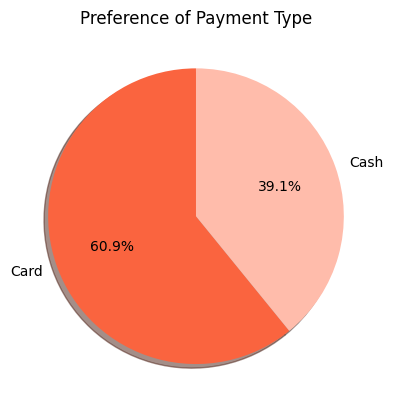

In [370]:
plt.title('Preference of Payment Type')
plt.pie(taxi_data['payment_type'].value_counts(normalize = True), labels = taxi_data['payment_type'].value_counts().index,
       startangle = 90,shadow = True, autopct = '%1.1f%%', colors = ['#FA643F','#FFBCAB'])
plt.show()

## Passenger Count Analysis
Amoung card payments ,rides with a single passenger (passenger_count=1)comprise the largest proportion ,constituting 40.01% of all card Transactions


In [371]:
passenger_count=taxi_data.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'},inplace=True)
passenger_count.reset_index(inplace=True)
passenger_count

,payment_type,passenger_count,count
0,Card,1,68986
1,Card,2,29530
2,Card,3,12244
3,Card,4,7663
4,Card,5,11151
5,Cash,1,45353
6,Cash,2,18156
7,Cash,3,7835
8,Cash,4,5668
9,Cash,5,6280


In [372]:
passenger_count['perc']=(passenger_count['count']/passenger_count['count'].sum())*100

In [373]:
print(passenger_count.shape)
print(passenger_count.head(10))


(10, 4)
  payment_type  passenger_count  count       perc
0         Card                1  68986  32.408182
1         Card                2  29530  13.872577
2         Card                3  12244   5.751975
3         Card                4   7663   3.599917
4         Card                5  11151   5.238507
5         Cash                1  45353  21.305892
6         Cash                2  18156   8.529310
7         Cash                3   7835   3.680719
8         Cash                4   5668   2.662708
9         Cash                5   6280   2.950213


In [374]:
df = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df['payment_type'] = ['Card','Cash']
df.iloc[0,1:] = passenger_count.iloc[:5,-1]
df.iloc[1,1:] = passenger_count.iloc[5:,-1]

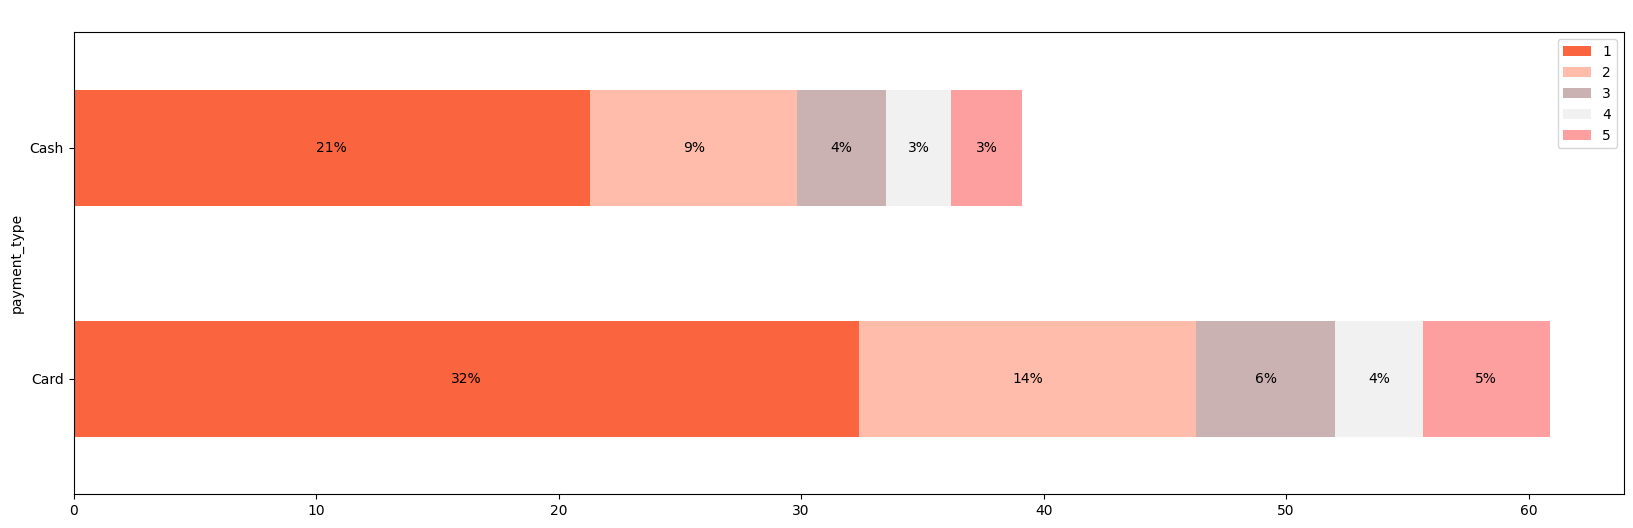

In [375]:



fig, ax = plt.subplots(figsize=(20, 6)) 
df.plot(x='payment_type', kind='barh', stacked=True, title=' ', ax=ax, color = ['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'] )

# Add percentage text
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

## HYPOTHESIS TESTING
NULL HYPOTHESIS:There is no diffrence between avg fare between customers who use credit cards and customers who use cash.


ALTERNATIVE HYPOTHESIS:There is a diffrence in average fare between customers who use credit cards and customers who use cash.

In order to select the most suitable test for our scenario, our initial step involves evaluating whether the distribution of fare amounts adheres to a normal distribution. While the histogram depicted above suggests otherwise, we will further confirm this by generating a QQ plot.

Quantile-quantile (QQ) plots can be used to assess whether the fare amount distributions for each payment type are approximately normally distributed. If the data points closely align with the diagonal line in the plot, it suggests that the data follows a normal distribution.

In [376]:
print(taxi_data.columns)

Index(['passenger_count', 'payment_type', 'fare_amount', 'trip_distance',
       'duration'],
      dtype='object')


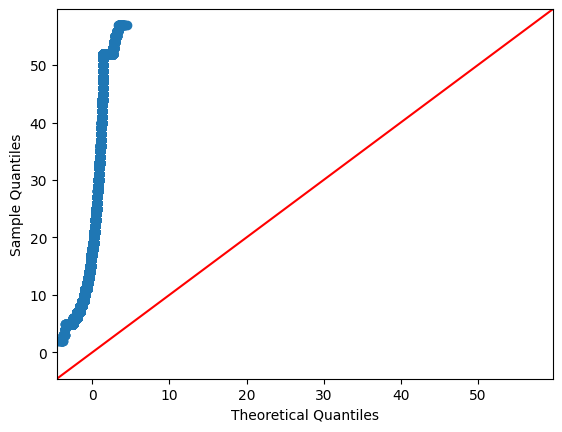

In [377]:
sm.qqplot(taxi_data['fare_amount'],line='45')
plt.show()

In [387]:
taxi_data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6,1,5
1,1,Card,7,1,8
10,2,Card,12,2,17
12,1,Card,17,3,25
13,1,Card,6,1,6
...,...,...,...,...,...
1048451,1,Cash,12,3,13
1048495,3,Card,52,17,31
1048522,1,Card,25,4,36
1048533,1,Card,12,3,8


In [389]:
card_sample=taxi_data[taxi_data['payment_type']=='Card']['fare_amount']
cash_sample=taxi_data[taxi_data['payment_type']=='Cash']['fare_amount']
card_sample = card_sample.dropna()
cash_sample = cash_sample.dropna()



In [390]:
print(card_sample.dtype)
print(cash_sample.dtype)

int64
int64


In [394]:
print(len(card_sample), len(cash_sample))


129574 83292


In [ ]:
t_stats, p_value = st.ttest_ind(a=card_sample,b=cash_sample, equal_var=False)
print(f"T-statistic: {t_stats}, P-value: {p_value}")
#significancevalue is 0.05 ,p value is less than 0.05 then we have to reject null hypothesis




T-statistic: 53.88488405231095, P-value: 0.0


## Regression Analysis

In [396]:
df = taxi_data[['duration', 'fare_amount']].dropna()


In [400]:
df = df[(df['duration'] > 0) & (df['fare_amount'] > 0)]

In [401]:
X = df[['duration']]   # Feature must be 2D for sklearn
y = df['fare_amount']  # Target

In [402]:
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [403]:
y_pred = model.predict(X)

# Print model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# Model performance
print(f"R-squared: {r2_score(y, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y, y_pred)}")


Intercept: -0.07266354999635283
Coefficient: 1.0745990586013592
R-squared: 0.5763066905509953
Mean Squared Error: 70.02191379852398


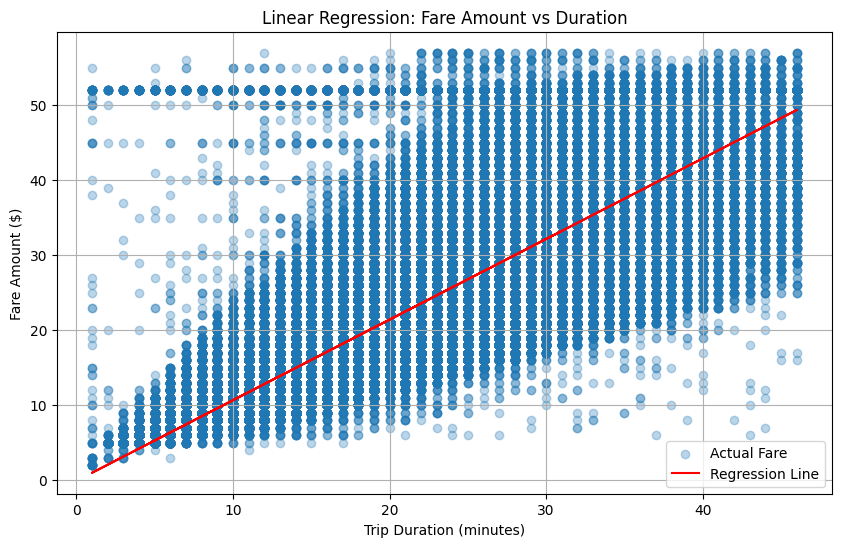

In [404]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.3, label='Actual Fare')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.title('Linear Regression: Fare Amount vs Duration')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
taxi_data

,level_0,index,passenger_count,payment_type,fare_amount,trip_distance,duration
0,0,0,1,Card,6,1,5
1,1,1,1,Card,7,1,8
2,2,10,2,Card,12,2,17
3,3,12,1,Card,17,3,25
4,4,13,1,Card,6,1,6
...,...,...,...,...,...,...,...
212861,212861,1048451,1,Cash,12,3,13
212862,212862,1048495,3,Card,52,17,31
212863,212863,1048522,1,Card,25,4,36
212864,212864,1048533,1,Card,12,3,8


## Compare Card vs Cash over Time(Time Series Analysis)

In [41]:
# Assuming you saved original raw dataset as `raw_data`
raw_data = pd.read_csv('yellow_tripdata_2020-01.csv')

# Reset index so we get a proper numeric column
raw_data = raw_data.reset_index()

# Now extract index and datetime
pickup_times = raw_data[['index', 'tpep_pickup_datetime']]

# Merge with your cleaned data
taxi_data = taxi_data.merge(pickup_times, on='index', how='left')





In [42]:
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'], dayfirst=True, errors='coerce')



In [44]:
taxi_data


,level_0,index,passenger_count,payment_type,fare_amount,trip_distance,duration,rolling_avg_fare,tpep_pickup_datetime
0,0,0,1,Card,6,1,5,NaN,2020-01-01 00:28:00
1,1,1,1,Card,7,1,8,NaN,2020-01-01 00:35:00
2,2,10,2,Card,12,2,17,NaN,2020-01-01 00:55:00
3,3,12,1,Card,17,3,25,NaN,2020-01-01 00:56:00
4,4,13,1,Card,6,1,6,NaN,2020-01-01 00:21:00
...,...,...,...,...,...,...,...,...,...
212861,212861,1048451,1,Cash,12,3,13,22.738,2020-01-07 07:50:00
212862,212862,1048495,3,Card,52,17,31,22.776,2020-01-07 07:24:00
212863,212863,1048522,1,Card,25,4,36,22.786,2020-01-07 07:54:00
212864,212864,1048533,1,Card,12,3,8,22.724,2020-01-07 07:52:00


In [45]:
print(monthly_fare.head(10))
print(monthly_fare.tail(10))
print(monthly_fare.isna().sum())


tpep_pickup_datetime
2009-01-31    30.0
2009-02-28     NaN
2009-03-31     NaN
2009-04-30     NaN
2009-05-31     NaN
2009-06-30     NaN
2009-07-31     NaN
2009-08-31     NaN
2009-09-30     NaN
2009-10-31     NaN
Freq: ME, Name: fare_amount, dtype: float64
tpep_pickup_datetime
2019-04-30          NaN
2019-05-31          NaN
2019-06-30          NaN
2019-07-31          NaN
2019-08-31          NaN
2019-09-30          NaN
2019-10-31          NaN
2019-11-30          NaN
2019-12-31    14.865385
2020-01-31    21.654333
Freq: ME, Name: fare_amount, dtype: float64
130


In [46]:
taxi_data = taxi_data[~taxi_data['tpep_pickup_datetime'].isna()]
taxi_data = taxi_data[~taxi_data['fare_amount'].isna()]



In [47]:
# Step 3: Set datetime column as index for time series resampling
taxi_data.set_index('tpep_pickup_datetime', inplace=True)

# Step 4: Resample monthly and calculate average fare
monthly_fare = taxi_data['fare_amount'].resample('M').mean()


In [48]:
display(monthly_fare.head(10))
display(monthly_fare.tail(10))
print("Missing values in monthly_fare:", monthly_fare.isna().sum())

tpep_pickup_datetime
2009-01-31    30.0
2009-02-28     NaN
2009-03-31     NaN
2009-04-30     NaN
2009-05-31     NaN
2009-06-30     NaN
2009-07-31     NaN
2009-08-31     NaN
2009-09-30     NaN
2009-10-31     NaN
Freq: ME, Name: fare_amount, dtype: float64

tpep_pickup_datetime
2019-04-30          NaN
2019-05-31          NaN
2019-06-30          NaN
2019-07-31          NaN
2019-08-31          NaN
2019-09-30          NaN
2019-10-31          NaN
2019-11-30          NaN
2019-12-31    14.865385
2020-01-31    21.654333
Freq: ME, Name: fare_amount, dtype: float64

Missing values in monthly_fare: 130


In [50]:
taxi_data = taxi_data[
    (taxi_data.index >= '2019-01-01') & (taxi_data.index <= '2021-12-31')
]


In [51]:
monthly_fare = taxi_data['fare_amount'].resample('M').mean()

In [52]:
display(monthly_fare.head(10))
display(monthly_fare.tail(10))
print("Missing values after filtering:", monthly_fare.isna().sum())

tpep_pickup_datetime
2019-12-31    14.865385
2020-01-31    21.654333
Freq: ME, Name: fare_amount, dtype: float64

tpep_pickup_datetime
2019-12-31    14.865385
2020-01-31    21.654333
Freq: ME, Name: fare_amount, dtype: float64

Missing values after filtering: 0


In [62]:
taxi_data


,level_0,index,passenger_count,payment_type,fare_amount,trip_distance,duration,rolling_avg_fare
tpep_pickup_datetime,,,,,,,,
2020-01-01 00:28:00,0,0,1,Card,6,1,5,NaN
2020-01-01 00:35:00,1,1,1,Card,7,1,8,NaN
2020-01-01 00:55:00,2,10,2,Card,12,2,17,NaN
2020-01-01 00:56:00,3,12,1,Card,17,3,25,NaN
2020-01-01 00:21:00,4,13,1,Card,6,1,6,NaN
...,...,...,...,...,...,...,...,...
2020-01-07 07:50:00,212861,1048451,1,Cash,12,3,13,22.738
2020-01-07 07:24:00,212862,1048495,3,Card,52,17,31,22.776
2020-01-07 07:54:00,212863,1048522,1,Card,25,4,36,22.786


In [68]:
print(taxi_data.index.dtype)

datetime64[ns]


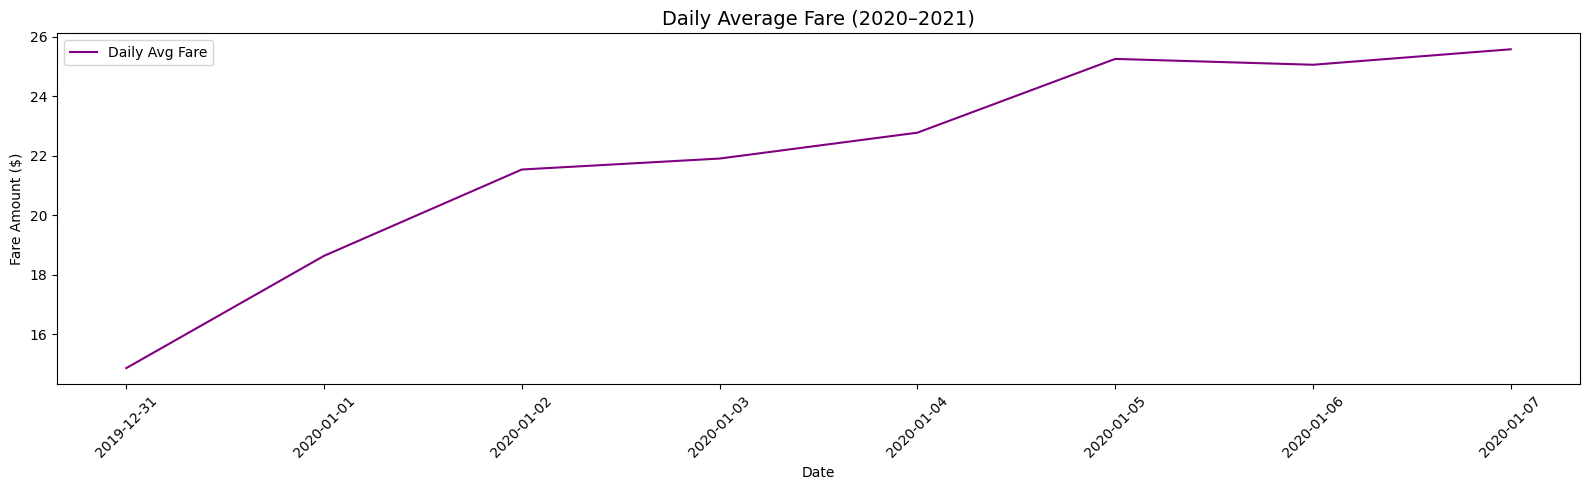

In [69]:
import matplotlib.pyplot as plt

daily_avg_fare = taxi_data['fare_amount'].resample('D').mean()

plt.figure(figsize=(16, 5))
plt.plot(daily_avg_fare.index, daily_avg_fare.values, color='purple', label='Daily Avg Fare')
plt.title("Daily Average Fare (2020–2021)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Fare Amount ($)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [70]:
taxi_data['hour'] = taxi_data.index.hour


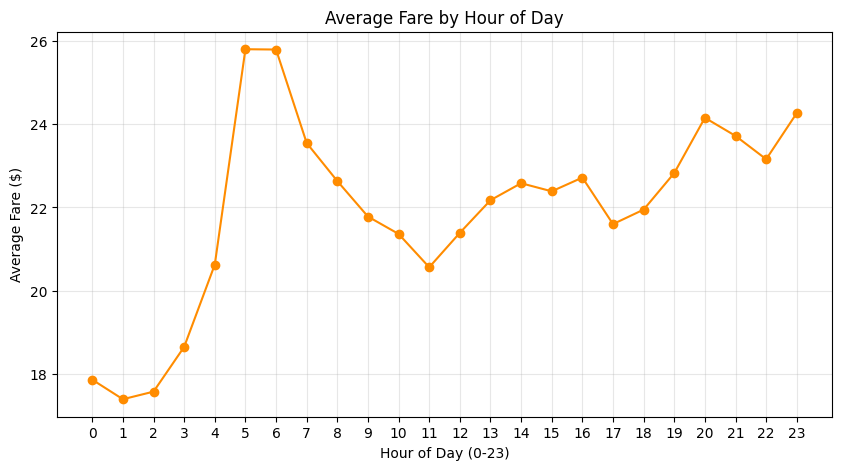

In [71]:
import matplotlib.pyplot as plt

# Group by hour and take mean fare
hourly_fare = taxi_data.groupby('hour')['fare_amount'].mean()

plt.figure(figsize=(10, 5))
plt.plot(hourly_fare.index, hourly_fare.values, marker='o', color='darkorange')
plt.title('Average Fare by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Average Fare ($)')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))  # Show every hour
plt.show()


## Compare Payment Types by Hour

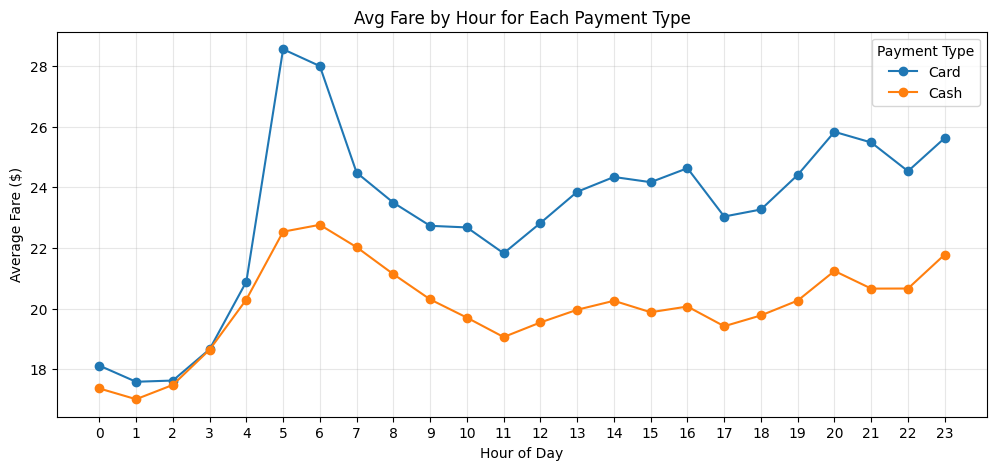

In [72]:
hourly_fare_by_payment = taxi_data.groupby(['hour', 'payment_type'])['fare_amount'].mean().unstack()

hourly_fare_by_payment.plot(kind='line', figsize=(12, 5), marker='o')
plt.title("Avg Fare by Hour for Each Payment Type")
plt.xlabel("Hour of Day")
plt.ylabel("Average Fare ($)")
plt.grid(True, alpha=0.3)
plt.legend(title='Payment Type')
plt.xticks(range(0, 24))
plt.show()
